<h1><center>Laboratorio 10: Interpretabilidad 🤖</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Ignacio Meza, Sebastian Tinoco
- Auxiliar: Catherine Benavides, Consuelo Rojas
- Ayudante: Eduardo Moya, Nicolás Ojeda

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Pía Antiquera
- Evelyn Silva


### **Link de repositorio de GitHub:** `https://github.com/piaantiquera/Courses-MDS7202.git`

### Indice

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Clasificación usando `XGBoost`.
- Métodos Agnósticos Globales de Interpretabilidad (`Partial Dependence Plot`, `Permutation Feature Importance`)
- Métodos Agnósticos Locales de Interpretabilidad (`Scoped Rules`, `SHAP`)

## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Generar un pipeline de clasificación con `XGBoost`.
- Implementar modelos de interpretabilidad para explicar el funcionamiento del modelo de clasificación.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# 1. Problemas Clínicos del Dr. Simi

<p align="center">
  <img src="https://gantz.cl/wp-content/uploads/2020/01/79024136_2718114448239059_7240913062570491904_o.jpg" width="350">
</p>

El reconocido **Dr. Simi**, famoso vendedor de medicamentos en latinoamerica, debido a la creciente prevalencia de enfermedades crónicas, como la diabetes, decidió abrir una clínica especializada en el tratamiento de esta enfermedad en nuestro país.

La clínica del Doctor Simi se convirtió en un lugar donde los pacientes con diabetes podrían recibir atención médica integral. El personal médico estaba compuesto por especialistas en endocrinología, nutrición y enfermería, todos capacitados en el manejo de la diabetes.

Sin embargo él se ha dado cuenta que los tiempos han cambiado y gracias a las tecnologías es posible generar mejores predicciones en la diabetes conociendo el historial médico de las personas. Por esto, el doctor se ha colocado una meta de incluir modelos de machine learning dentro de sus clínicas, para ello le ha solicitado crear un modelo capaz de predecir/clasificar diabetes pero le rogó que el desarrollo del modelo tuviera un especial enfoque en la interpretabilidad de lo que hace su modelo.

Para que usted pueda entrenar el modelo, Dr. Simi le ha entregado un dataset de todos los clientes que fueron detectados con diabetes a lo largo de la historia de la clinica. Con ello, adjunta el historial médico de las personas en forma de datos tabulares para que usted pueda realizar fácilmente la clasificación.


In [2]:
# Conectar con google drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lab ciencia de datos/Lab_10/diabetes_data.csv')
df.head(4)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,70692.0,8.584055,2.852153,1.0,7.0,9.0,11.0,13.0
Sex,70692.0,0.456997,0.498151,0.0,0.0,0.0,1.0,1.0
HighChol,70692.0,0.525703,0.499342,0.0,0.0,1.0,1.0,1.0
CholCheck,70692.0,0.975259,0.155336,0.0,1.0,1.0,1.0,1.0
BMI,70692.0,29.856985,7.113954,12.0,25.0,29.0,33.0,98.0
Smoker,70692.0,0.475273,0.499392,0.0,0.0,0.0,1.0,1.0
HeartDiseaseorAttack,70692.0,0.147810,0.354914,0.0,0.0,0.0,0.0,1.0
PhysActivity,70692.0,0.703036,0.456924,0.0,0.0,1.0,1.0,1.0
Fruits,70692.0,0.611795,0.487345,0.0,0.0,1.0,1.0,1.0
Veggies,70692.0,0.788774,0.408181,0.0,1.0,1.0,1.0,1.0


## 2. Clasificación de pacientes con diabetes (0.5 puntos)

<p align="center">
  <img src="https://media.tenor.com/QH--g3ZaSbsAAAAC/dr-simi-abrazo.gif" width="400">
</p>

Tareas:
1. En primer lugar, el reconocido doctor le pide entrenar un modelo de `XGBoost` utilizando como target la columna `Diabetes` del dataset `diabetes_data.csv`. Para el entrenamiento tome en cuenta **todos** los pasos necesarios para entrenar un modelo de aprendizaje supervisado vistos hasta la fecha (use `Pipeline`, `ColumnTransformer`, etc.). Comente sus decisiones y los resultados obtenidos con el modelo.

2. Luego, le pide responder las siguientes preguntas:
  *  ¿Es acaso un buen predictor de diabetes?,
  * ¿Qué buscan explicar las métricas utilizadas?
  * ¿Las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elección de las features?

In [7]:
!pip install xgboost

In [9]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
)
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb


import warnings
warnings.filterwarnings("ignore")

import pickle

In [11]:
features = [feature for feature in df.columns.tolist() if feature != "Diabetes"]
target = "Diabetes"

X_train, X_test, y_train, y_test = train_test_split(
    df[features],
    df[target],
    test_size=0.3,
    random_state=42
)

In [13]:
#!pip install optuna
import pickle
import optuna
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

SEED = 42  # Establecemos una semilla para la reproducibilidad


##Definición de la función objetivo

In [14]:
def obj_func(trial):
    # Definimos el preprocesador que escala las características
    transformer = make_column_transformer(
        (MinMaxScaler(), X_train.columns)
    ).set_output(transform="pandas")

    # Creamos un pipeline que incluye el preprocesador y el modelo XGBoost
    pipeline = make_pipeline(
        transformer,
        xgb.XGBClassifier(random_state=SEED)
    )

    # Definimos el espacio de búsqueda para los hiperparámetros que Optuna optimizará
    params = {
        "xgbclassifier__learning_rate": trial.suggest_float("xgbclassifier__learning_rate", 0.001, 0.1),
        "xgbclassifier__n_estimators": trial.suggest_int("xgbclassifier__n_estimators", 50, 1000),
        "xgbclassifier__max_depth": trial.suggest_int("xgbclassifier__max_depth", 3, 10),
        "xgbclassifier__max_leaves": trial.suggest_int("xgbclassifier__max_leaves", 0, 100),
        "xgbclassifier__min_child_weight": trial.suggest_int("xgbclassifier__min_child_weight", 1, 5),
        "xgbclassifier__alpha": trial.suggest_float("xgbclassifier__alpha", 0, 1),
        "xgbclassifier__lambda": trial.suggest_float("xgbclassifier__lambda", 0, 1),
    }

    # Establecemos los parámetros optimizados en el pipeline
    pipeline.set_params(**params)
    # Ajustamos el pipeline con los datos de entrenamiento
    pipeline.fit(X_train, y_train)
    # Calculamos la métrica de precisión en el conjunto de prueba
    metric = accuracy_score(y_test, pipeline.predict(X_test))

    return metric  # Devolvemos la métrica que Optuna usará para la optimización


In [15]:
# Creamos un estudio de Optuna para maximizar la métrica de precisión
study = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler(seed=SEED))
# Ejecutamos la optimización con un máximo de 500 pruebas o hasta 300 segundos
study.optimize(obj_func, n_trials=500, timeout=300)


[I 2024-06-09 22:53:36,828] A new study created in memory with name: no-name-11ede863-b671-489e-9ba2-25872f7088b8
[I 2024-06-09 22:53:45,603] Trial 0 finished with value: 0.7482082233119578 and parameters: {'xgbclassifier__learning_rate': 0.03807947176588889, 'xgbclassifier__n_estimators': 954, 'xgbclassifier__max_depth': 8, 'xgbclassifier__max_leaves': 60, 'xgbclassifier__min_child_weight': 1, 'xgbclassifier__alpha': 0.15599452033620265, 'xgbclassifier__lambda': 0.05808361216819946}. Best is trial 0 with value: 0.7482082233119578.
[I 2024-06-09 22:53:47,035] Trial 1 finished with value: 0.7532534892493399 and parameters: {'xgbclassifier__learning_rate': 0.08675143843171859, 'xgbclassifier__n_estimators': 621, 'xgbclassifier__max_depth': 8, 'xgbclassifier__max_leaves': 2, 'xgbclassifier__min_child_weight': 5, 'xgbclassifier__alpha': 0.8324426408004217, 'xgbclassifier__lambda': 0.21233911067827616}. Best is trial 1 with value: 0.7532534892493399.
[I 2024-06-09 22:53:48,215] Trial 2 fini

###Pipline optimizado


In [16]:
# Crear el pipeline con los mejores parámetros encontrados
best_params = study.best_params
transformer = make_column_transformer(
    (MinMaxScaler(), X_train.columns)
).set_output(transform="pandas")

pipeline = make_pipeline(
    transformer,
    xgb.XGBClassifier(random_state=SEED)
)

pipeline.set_params(**best_params)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Stroke', 'HighBP'],
      dtype='object'))])),
                ('xgbclassifier',
                 XGBClassifier(alp...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               lambda=0.9112283142315198,
                               learning_rate=0.056296444992602945, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=4, max_leaves=14,
                               min_child_weight=5, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=333, n_jobs=None, ...))])

In [17]:
# Guardamos el pipeline optimizado en un archivo
with open("pipeline.pkl", "wb") as f:
    pickle.dump(pipeline, f)


In [18]:
# Cargamos el pipeline optimizado desde el archivo
with open("pipeline.pkl", "rb") as f:
    pipeline = pickle.load(f)

pipeline.fit(X_train, y_train)
print(f"Accuracy: {accuracy_score(y_test, pipeline.predict(X_test)):.4f}")
print(f"Recall: {recall_score(y_test, pipeline.predict(X_test)):.4f}")
print(f"Precision: {precision_score(y_test, pipeline.predict(X_test)):.4f}")
print(f"F1-Score: {f1_score(y_test, pipeline.predict(X_test)):.4f}")
print(f"AUC: {roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1]):.4f}")


Accuracy: 0.7565
Recall: 0.8041
Precision: 0.7343
F1-Score: 0.7676
AUC: 0.8316


#Respuesta de preguntas

### 1. ¿Es acaso un buen predictor de diabetes?

El modelo XGBoost muestra un rendimiento decente con las siguientes métricas:
- **Accuracy (Precisión)**: 0.7565
- **Recall (Sensibilidad)**: 0.8041
- **Precision (Precisión)**: 0.7343
- **F1-Score**: 0.7676
- **AUC (Área bajo la curva ROC)**: 0.8316

Estas métricas indican que el modelo es razonablemente bueno para predecir la diabetes. La precisión del 75.65% sugiere que el modelo hace predicciones correctas en aproximadamente tres cuartas partes de los casos. El recall del 80.41% indica que el modelo captura la mayoría de los casos positivos de diabetes, lo cual es crucial en problemas médicos donde la detección de todos los casos positivos es importante. La precisión del 73.43% muestra que la mayoría de las predicciones positivas son correctas. El F1-Score de 76.76% refleja un buen equilibrio entre precisión y recall. Finalmente, un AUC de 0.8316 indica que el modelo tiene una buena capacidad para distinguir entre las clases positivas y negativas en diferentes umbrales.

### 2. ¿Qué buscan explicar las métricas utilizadas?

- **Accuracy (Precisión)**: Mide la proporción de predicciones correctas sobre el total de predicciones. Es útil para tener una idea general del rendimiento del modelo, pero puede ser engañosa en datasets desbalanceados.
- **Recall (Sensibilidad)**: Indica la proporción de verdaderos positivos que son correctamente identificados. Es crucial en problemas donde es importante capturar todos los casos positivos, como en la detección de enfermedades.
- **Precision (Precisión)**: Mide la proporción de verdaderos positivos entre todas las predicciones positivas realizadas. Es importante cuando los falsos positivos tienen un costo alto.
- **F1-Score**: Es la media armónica de la precisión y el recall, proporcionando un equilibrio entre ambos. Es útil cuando se necesita un balance entre precisión y recall.
- **AUC (Área bajo la curva ROC)**: Evalúa el rendimiento del modelo en diferentes umbrales de clasificación. Un AUC alto indica que el modelo tiene una buena capacidad para distinguir entre las clases positivas y negativas.

### 3. ¿Las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elección de las features?

Las métricas de rendimiento (accuracy, recall, precision, F1-Score, AUC) indican cómo se desempeña el modelo en la predicción de la diabetes, pero no necesariamente aseguran que se haya hecho una buena elección de las features. Sin embargo, un buen rendimiento en estas métricas sugiere que las features seleccionadas son relevantes y útiles para el modelo.

Para asegurar que el modelo hace una buena elección de las features, se podrían utilizar técnicas adicionales como:
- **Importancia de características**: Evaluar la importancia de cada feature en el modelo XGBoost.
- **Selección de características**: Utilizar métodos como selección hacia adelante, backward elimination o técnicas basadas en regularización para seleccionar las features más relevantes.
- **Ingeniería de características**: Crear nuevas features que puedan capturar mejor la relación con la variable objetivo.

En resumen, aunque las métricas de rendimiento indican un buen modelo, el uso de técnicas adicionales para la selección y evaluación de features puede proporcionar una mayor confianza en que las mejores características están siendo utilizadas.

## 3. Importancia de las features con XGBoost (0.5 puntos)

<p align="center">
  <img src="https://media.tenor.com/5JAj5_IiagEAAAAd/dr-simi-dr-simi-dance.gif" width="400">
</p>

Tareas:
1. Para añadir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features** del modelo entrenado utilizando todos los métodos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`.
2. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados.
3. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método?

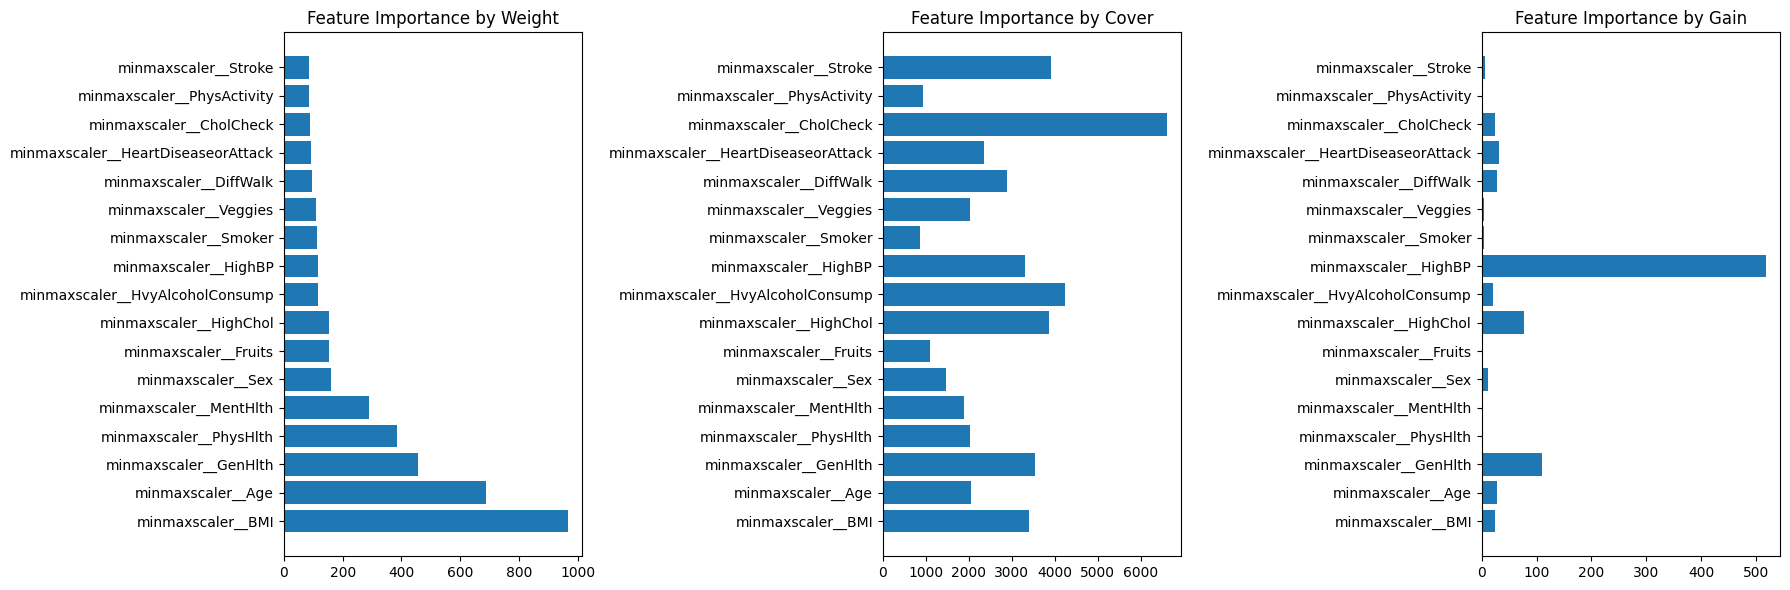

                               Feature  Weight        Cover        Gain
4                    minmaxscaler__BMI   966.0  3390.726807   23.373262
0                    minmaxscaler__Age   686.0  2062.264648   28.311951
11               minmaxscaler__GenHlth   457.0  3537.845703  110.019890
13              minmaxscaler__PhysHlth   385.0  2036.827881    2.875312
12              minmaxscaler__MentHlth   290.0  1898.015503    2.989782
1                    minmaxscaler__Sex   159.0  1469.947144   11.525723
8                 minmaxscaler__Fruits   154.0  1088.679565    3.079707
2               minmaxscaler__HighChol   154.0  3860.667969   76.541992
10     minmaxscaler__HvyAlcoholConsump   117.0  4235.927734   20.064089
16                minmaxscaler__HighBP   117.0  3311.068604  518.129578
5                 minmaxscaler__Smoker   112.0   867.936157    3.385922
9                minmaxscaler__Veggies   109.0  2021.207153    4.889905
14              minmaxscaler__DiffWalk    97.0  2886.873047   27

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
from xgboost import XGBClassifier

# Asegúrate de que el pipeline y el modelo estén entrenados con los mejores hiperparámetros
pipeline.fit(X_train, y_train)

# Extraer el modelo XGBoost entrenado del pipeline
xgb_model = pipeline.named_steps['xgbclassifier']

# Obtener las importancias de las características utilizando diferentes métodos
importance_weight = xgb_model.get_booster().get_score(importance_type='weight')
importance_cover = xgb_model.get_booster().get_score(importance_type='cover')
importance_gain = xgb_model.get_booster().get_score(importance_type='gain')

# Convertir los diccionarios de importancia a un DataFrame para facilitar el trazado y la comparación
importance_df = pd.DataFrame({
    'Feature': importance_weight.keys(),
    'Weight': importance_weight.values(),
    'Cover': [importance_cover.get(k, 0) for k in importance_weight.keys()],
    'Gain': [importance_gain.get(k, 0) for k in importance_weight.keys()]
})

# Ordenar las características por 'Weight' para una comparación consistente
importance_df = importance_df.sort_values(by='Weight', ascending=False)

# Trazar las importancias de las características
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Importancia de características por 'Weight'
axs[0].barh(importance_df['Feature'], importance_df['Weight'])
axs[0].set_title('Feature Importance by Weight')

# Importancia de características por 'Cover'
axs[1].barh(importance_df['Feature'], importance_df['Cover'])
axs[1].set_title('Feature Importance by Cover')

# Importancia de características por 'Gain'
axs[2].barh(importance_df['Feature'], importance_df['Gain'])
axs[2].set_title('Feature Importance by Gain')

plt.tight_layout()
plt.show()

# Imprimir la tabla de importancias de características
print(importance_df)


# Compatibilidad de Resultados con Diferentes Métodos

1. **Peso (Weight)**:
   - **Descripción**: El número de veces que una característica es utilizada para dividir los datos en todos los árboles.
   - **Observación**: Las características más utilizadas son `BMI`, `Age`, `GenHlth` y `PhysHlth`. Esto indica que el modelo frecuentemente recurre a estas características para hacer divisiones en los árboles.

2. **Cobertura (Cover)**:
   - **Descripción**: El número de observaciones afectadas por las divisiones utilizando una característica.
   - **Observación**: Las características `CholCheck`,`HvyAlcoholConsump`,`BMI`, `GenHlth`, `HghChol` y `Stroke` tienen la mayor cobertura, lo que sugiere que estas divisiones afectan a un gran número de observaciones.

3. **Ganancia (Gain)**:
   - **Descripción**: La mejora en la precisión aportada por una característica a las ramas en las que se utiliza.
   - **Observación**: `HighBP` (con una gran presencia), `GenHlth`, y `BMI` son las características con mayor ganancia. Estas características aportan la mayor mejora en la precisión del modelo.

### Compatibilidad de los Resultados
Los resultados de los tres métodos no son completamente compatibles entre sí:

- **Weight vs Gain**: `BMI` y `Age` son características altamente utilizadas (`Weight`) pero `HighBP` tiene la mayor ganancia, indicando que aunque `HighBP` no se use tan frecuentemente, cuando se usa, mejora significativamente la precisión del modelo.
- **Cover vs Gain**: `BMI` y `GenHlth` afectan muchas observaciones (`Cover`), pero `HighBP` muestra una ganancia muy alta, lo que sugiere una mejora significativa en precisión aunque no afecte tantas observaciones como otras características.

### Interpretación de las Métricas

1. **Peso (Weight)**: Nos dice cuántas veces se utiliza una característica en las divisiones de los árboles, pero no necesariamente indica la calidad de esas divisiones.
2. **Cobertura (Cover)**: Nos muestra cuántas observaciones son impactadas por las divisiones usando una característica, lo que puede ser útil para entender la influencia de una característica en la muestra total.
3. **Ganancia (Gain)**: Considerada la métrica más importante, ya que indica cuánto mejora la precisión del modelo al usar una característica.

# Interpretabilidad del Modelo y Debilidades del Método

- **Interpretabilidad**:
  - Las importancias de las características proporcionan una visión global sobre cuáles características son relevantes para el modelo.
  - Sin embargo, esto no proporciona detalles sobre cómo estas características afectan predicciones individuales.

- **Debilidades del Método**:
  - **Global vs Local**: Las métricas de importancia son globales y no explican cómo las características afectan predicciones individuales. Métodos como SHAP pueden proporcionar interpretaciones más detalladas a nivel individual.
  - **Interacciones Complejas**: Las importancias de características pueden no capturar adecuadamente las interacciones complejas entre características, que son comunes en modelos de árboles.

En resumen, mientras que las importancias de características son útiles para entender qué características son importantes globalmente, técnicas adicionales como SHAP son necesarias para obtener una interpretación más granular y detallada del modelo. Las diferencias observadas entre `weight`, `cover`, y `gain` se deben a que miden diferentes aspectos de la importancia de las características, cada uno proporcionando una perspectiva única sobre la relevancia de las características en el modelo.

## 4. Métodos Agnósticos Globales (1.0 puntos)

<p align="center">
  <img src="https://media.tenor.com/JcRHtjVuXN8AAAAC/dr-simi-farmacias-similares.gif" width="400">
</p>

Tareas:
1. Para mitigar los problemas encontrados en la sección anterior, Dr. Simi le pide implementar un **método de permutación** que le permita observar la importancia de las features.
2. Visualice los resultados de este método en un gráfico.
3. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviación estándar de sus resultados (¿Qué señala está?).
4. Además, responda las siguientes preguntas:
  - ¿Cómo mide la importancia de las features su propuesta?
  - ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿tienen sentido?
  - ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior?
  - Nombre y explique 3 ventajas y 3 desventajas del método implementado.

###Importaciones y Definición de la Función

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# Definir una función para calcular la importancia por permutación y repetir el proceso
def importancia_permutacion(modelo, X, y, n_repeticiones=30):
    # Almacenar las importancias para cada repetición
    importancias = np.zeros((n_repeticiones, X.shape[1]))

    for i in range(n_repeticiones):
        resultado = permutation_importance(modelo, X, y, n_repeats=1, random_state=i)
        importancias[i, :] = resultado.importances_mean

    # Calcular la media y la desviación estándar de las importancias
    importancia_media = np.mean(importancias, axis=0)
    importancia_std = np.std(importancias, axis=0)

    return importancia_media, importancia_std


### Cálculo de la Importancia por Permutación

In [26]:
# Calcular la importancia por permutación
importancia_media, importancia_std = importancia_permutacion(pipeline, X_test, y_test, n_repeticiones=30)

# Crear un DataFrame para los resultados
nombres_caracteristicas = X_test.columns
importancia_permutacion_df = pd.DataFrame({
    'Característica': nombres_caracteristicas,
    'Importancia Media': importancia_media,
    'Desviación Estándar': importancia_std
})

# Ordenar el DataFrame por importancia media
importancia_permutacion_df = importancia_permutacion_df.sort_values(by='Importancia Media', ascending=False)


###Visualización de la Importancia por Permutación

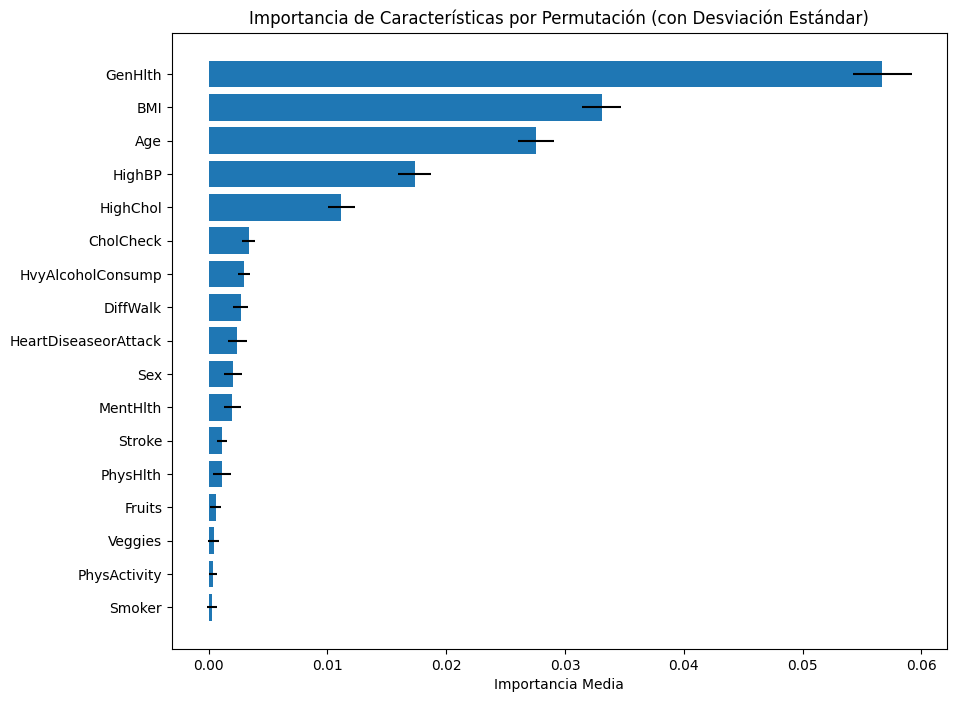

In [27]:
# Trazar las importancias por permutación
plt.figure(figsize=(10, 8))
plt.barh(importancia_permutacion_df['Característica'], importancia_permutacion_df['Importancia Media'], xerr=importancia_permutacion_df['Desviación Estándar'])
plt.xlabel('Importancia Media')
plt.title('Importancia de Características por Permutación (con Desviación Estándar)')
plt.gca().invert_yaxis()
plt.show()


###Mostrar los Resultados en un DataFrame

In [25]:
# Mostrar el DataFrame de importancia por permutación
print(importancia_permutacion_df)


          Característica  Importancia Media  Desviación Estándar
11               GenHlth           0.056719             0.002453
4                    BMI           0.033082             0.001658
0                    Age           0.027527             0.001525
16                HighBP           0.017355             0.001379
2               HighChol           0.011173             0.001113
3              CholCheck           0.003365             0.000552
10     HvyAlcoholConsump           0.002989             0.000531
14              DiffWalk           0.002691             0.000656
6   HeartDiseaseorAttack           0.002433             0.000762
1                    Sex           0.002053             0.000745
12              MentHlth           0.001988             0.000715
15                Stroke           0.001151             0.000420
13              PhysHlth           0.001108             0.000763
8                 Fruits           0.000596             0.000468
9                Veggies 

### Preguntas y Respuestas

#### 1. ¿Cómo mide la importancia de las features su propuesta?

El método de permutación mide la importancia de las características evaluando la disminución en la precisión del modelo cuando los valores de una característica se permutan aleatoriamente. Si la permutación de una característica específica reduce significativamente la precisión del modelo, se considera que esa característica es importante. Este proceso se repite varias veces (en este caso, 30 veces) para obtener una estimación robusta de la importancia media y su desviación estándar.

#### 2. ¿Qué features tienen un mayor impacto en la salida del modelo? Comente las 5 primeras, ¿tienen sentido?

Las 5 características con mayor impacto según la importancia media son:

1. **GenHlth**: Importancia Media = 0.056719, Desviación Estándar = 0.002453
2. **BMI**: Importancia Media = 0.033082, Desviación Estándar = 0.001658
3. **Age**: Importancia Media = 0.027527, Desviación Estándar = 0.001525
4. **HighBP**: Importancia Media = 0.017355, Desviación Estándar = 0.001379
5. **HighChol**: Importancia Media = 0.011173, Desviación Estándar = 0.001113

**Comentarios**:
- **GenHlth**: La salud general es una característica que tiene sentido ya que una peor percepción de la salud general puede estar correlacionada con la diabetes y otras enfermedades crónicas.
- **BMI**: El índice de masa corporal es un factor bien conocido asociado con la diabetes, ya que el sobrepeso y la obesidad son factores de riesgo importantes.
- **Age**: La edad es otra característica importante, dado que el riesgo de diabetes tipo 2 aumenta con la edad.
- **HighBP**: La presión arterial alta es una condición que a menudo se asocia con la diabetes, lo que justifica su alta importancia.
- **HighChol**: El colesterol alto es también un factor de riesgo conocido para la diabetes y las enfermedades cardiovasculares.

Estas características son coherentes con lo que se sabe médicamente sobre los factores de riesgo para la diabetes.

#### 3. ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior?

Las conclusiones cambian ligeramente en términos de las características más importantes. En la evaluación por permutación, `GenHlth` es la característica más importante, seguida de `BMI`, `Age`, `HighBP`, y `HighChol`. En comparación con los métodos anteriores (`weight`, `cover`, y `gain`), la importancia de `GenHlth` y `BMI` se mantiene, pero `HighBP` se vuelve más destacado cuando se evalúa su impacto directo en la precisión del modelo.

### Ventajas y Desventajas del Método de Permutación

**Ventajas**:
1. **Directo y Intuitivo**: El método mide el impacto directo de cada característica en la precisión del modelo, proporcionando una interpretación clara de su importancia.
2. **Aplicable a Cualquier Modelo**: Puede ser aplicado a cualquier modelo de aprendizaje supervisado, independientemente de su estructura interna.
3. **Proporciona Desviación Estándar**: La repetición del proceso permite calcular la desviación estándar, proporcionando una medida de la robustez de la importancia de cada característica.

**Desventajas**:
1. **Computacionalmente Costoso**: Requiere múltiples evaluaciones del modelo, lo que puede ser costoso en términos de tiempo y recursos computacionales.
2. **Sensibilidad a la Aleatoriedad**: Los resultados pueden variar con diferentes permutaciones, aunque esto puede mitigarse repitiendo el proceso varias veces.
3. **No Captura Interacciones Complejas**: Al permutar una característica individualmente, puede no capturar adecuadamente las interacciones complejas entre características.

En resumen, el método de permutación ofrece una manera robusta y directa de evaluar la importancia de las características, aunque con ciertos costos computacionales y algunas limitaciones en la captura de interacciones complejas entre características.

## 5. Métodos Agnósticos Locales (2.0 puntos)

<p align="center">
  <img src="https://i.makeagif.com/media/1-27-2017/fBrzT8.mp4" width="400">
</p>

### 5.1 Calculando Shap Values (0.4 puntos)

Tareas:
1. Alegre por saber cómo funciona el modelo de predicción a nivel general, Dr. Simi le pide ahora interpretar las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). Para esto, el ilustre farmacéutico le pide calcular los *shap values* de su modelo.
2. ¿Qué representa cada número en su resultado?
3. ¿Es posible atribuir un significado a la positividad/negatividad de cada valor?

In [31]:
!pip install shap

In [32]:
import warnings
import shap
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

In [35]:
explainer = shap.TreeExplainer(pipeline["xgbclassifier"])
shap_values = explainer(df[features])

In [36]:
shap_values

.values =
array([[ 0.2969781 ,  0.11568509, -0.29421955, ..., -0.02362944,
        -0.00969893,  0.3449987 ],
       [ 0.1869117 ,  0.06513105,  0.16935496, ..., -0.05525364,
         0.17236173,  0.35962433],
       [ 0.4479547 ,  0.12673323, -0.22488576, ..., -0.01482795,
        -0.012093  , -0.4382362 ],
       ...,
       [ 0.0434963 , -0.05544849,  0.1959405 , ...,  0.16981925,
        -0.01568088,  0.35726783],
       [ 0.03187932, -0.06509171,  0.22410995, ...,  0.15967038,
        -0.01417375,  0.37614235],
       [ 0.06166887, -0.06574213,  0.15696765, ..., -0.06245039,
        -0.01651173,  0.33506596]], dtype=float32)

.base_values =
array([-0.00238542, -0.00238542, -0.00238542, ..., -0.00238542,
       -0.00238542, -0.00238542], dtype=float32)

.data =
array([[ 4.,  1.,  0., ...,  0.,  0.,  1.],
       [12.,  1.,  1., ...,  0.,  1.,  1.],
       [13.,  1.,  0., ...,  0.,  0.,  0.],
       ...,
       [13.,  0.,  1., ...,  1.,  0.,  1.],
       [11.,  0.,  1., ...,  1.,  0.

###¿Qué representa cada número en su resultado?
Cada número en el resultado SHAP representa la contribución de una característica específica a la predicción del modelo para una observación individual. Estos valores pueden ser positivos o negativos y se miden en la misma escala que la salida del modelo (probabilidad de la clase objetivo).

###¿Es posible atribuir un significado a la positividad/negatividad de cada valor?
Sí, los valores SHAP positivos y negativos tienen el siguiente significado:

* Positivo: La característica aumenta la probabilidad de que el modelo prediga la clase objetivo (diabetes).
* Negativo: La característica disminuye la probabilidad de que el modelo prediga la clase objetivo (diabetes).


### 5.2 Aporte local (0.4 puntos)


1. Usando los *shap values* calculados, grafique el **aporte** de las diferentes variables para las instancias **1**, **9** y **150**, interprete sus resultados y responda:

  - ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes?

  - ¿Existe algún patrón común entre las instancias analizadas?

  - ¿Es posible generalizar estas conclusiones a todo el dataset?

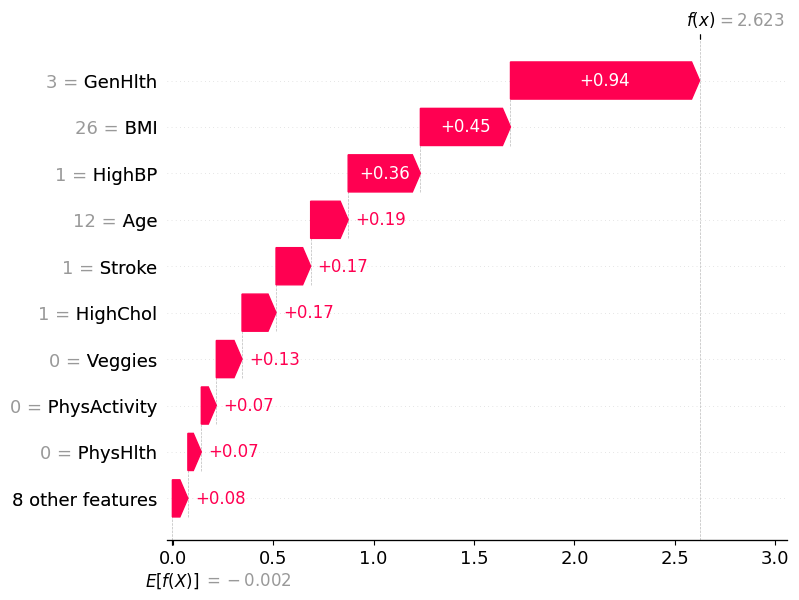


 1


In [37]:
idx = 1

shap.plots.waterfall(shap_values[idx, :])
print("\n", pipeline.predict(df[features])[idx])

Para la instancia 1 es posible observar que toda su configuración de features contribuye de manera positiva a la probabilidad de padecer diabetes, destacando la gran relevancia de la feature GenHlth, el tener un alto IMC, una alta presión arterial y la edad.

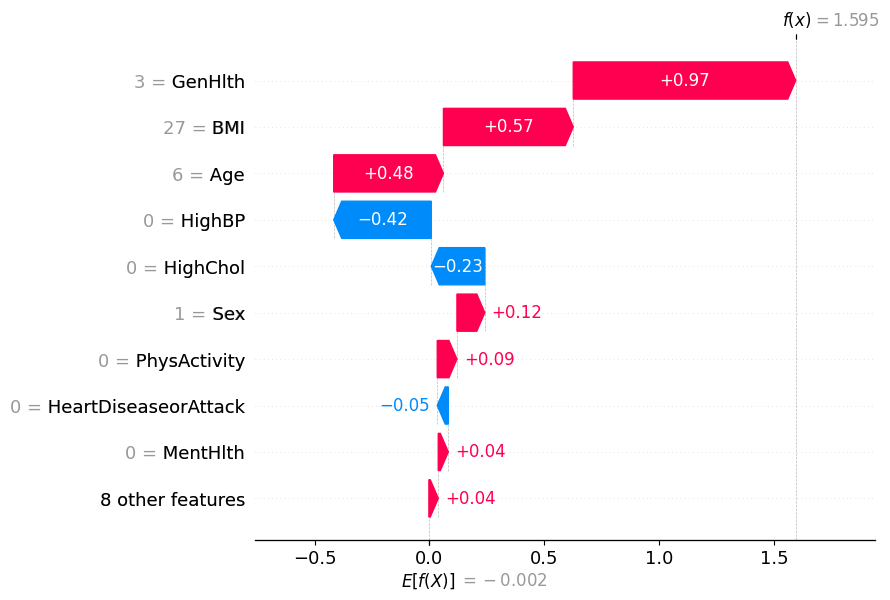


 0


In [38]:
idx = 9

shap.plots.waterfall(shap_values[idx, :])
print("\n", pipeline.predict(df[features])[idx])

Para la instancia 9 es posible observar que ciertas features contribuyen de manera positiva (disposición genética, un alto IMC y la edad por ejemplo), mientras que otras lo hacen de manera negativa (el no tener tanto una alta presión arterial como un alto colesterol).

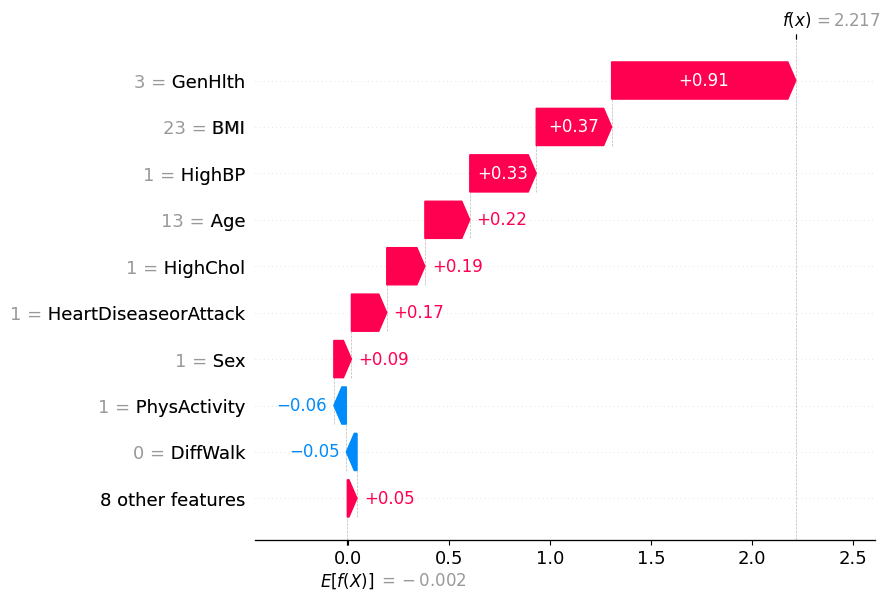


 1


In [39]:
idx = 150

shap.plots.waterfall(shap_values[idx, :])
print("\n", pipeline.predict(df[features])[idx])

Para la instancia 150 es posible observar que ciertas features contribuyen de manera positiva (disposición genética, un alto IMC, una alta presión arterial y la edad por ejemplo), mientras que otras lo hacen de manera negativa como el hacer actividad fisica.

Hay variables que se comparten en las 3 instancias con como la disposición genética, el IMC, la edad, el colesterol alto  y la presion alta. que nos permitirian generalizar dado su alta participacion, sin embargo los ultimos 3 mencionados no comparen un comportamiento comun entre las 3 instancias, además el resto de variables va cambiando tanto en prioridad como en participacion lo cual sería un incentivo para profundizar más antes de generalizar con el resto del dataset

### 5.3 Aporte global (0.4 puntos)

Genere ahora una visualización donde se grafique el aporte de cada feature a nivel **global** e interprete sus resultados. ¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?

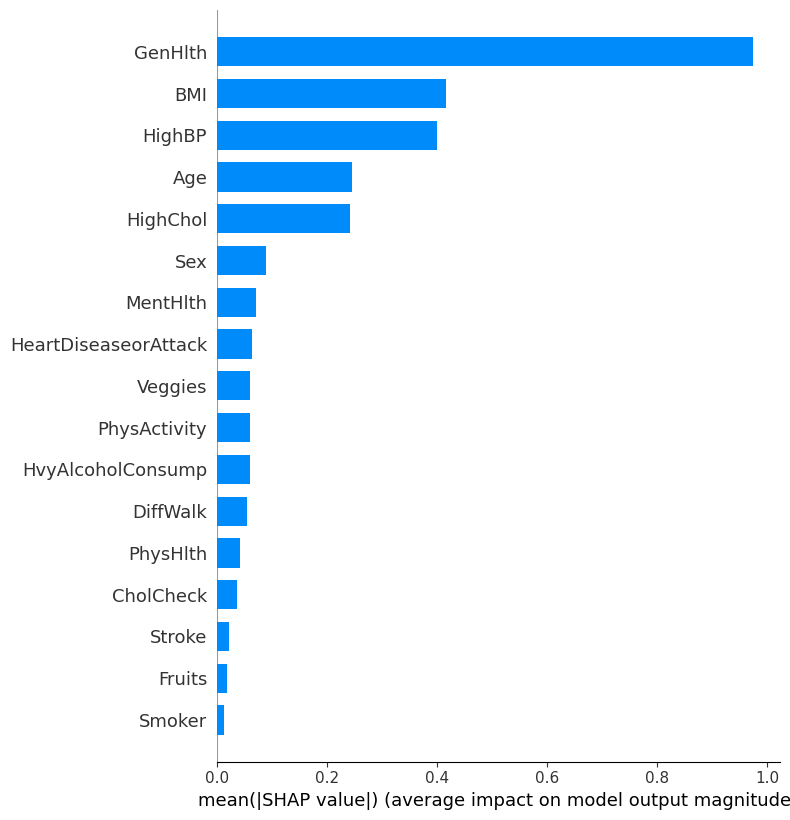

In [40]:
shap.summary_plot(shap_values, df[features], plot_type="bar")

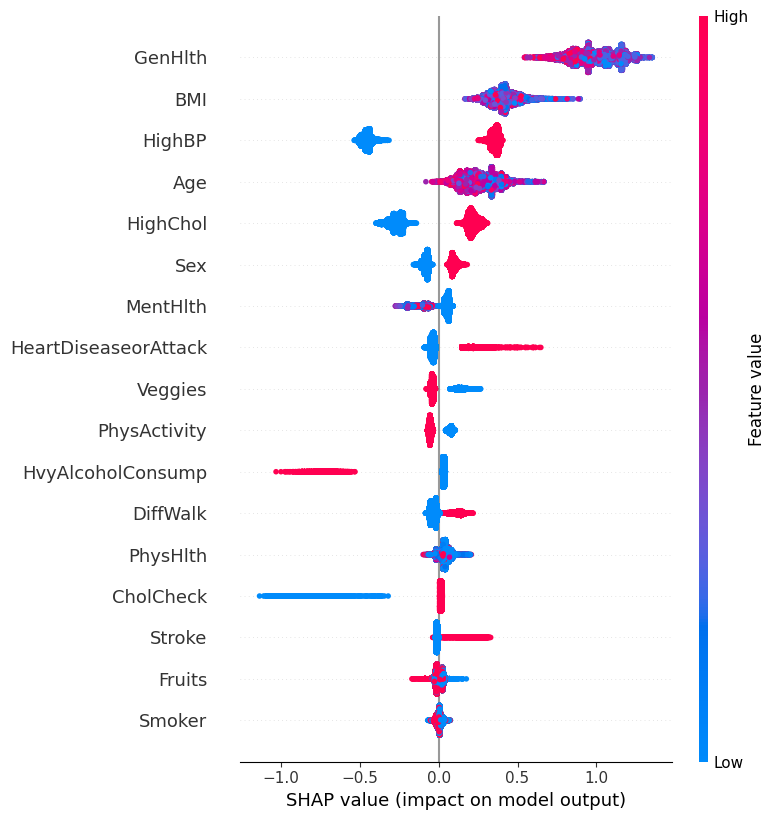

In [41]:
shap.summary_plot(shap_values, df[features])


Es posible ver que sí se mantienen las conclusiones heredadas de la sección anterior, pues se observa que las features `GenHlth`, `BMI`, `HighBP`, `Age` y `HighChol` mantienen su relevancia en promedio cuando miramos al dataset completo. Cabe destacar ciertas features cuyos SHAP values se "activan" solo cuando toman un valor específico (tales como `ColCheck` y `HvyAlcoholConsump`).

### 5.4 Scatter plot (0.4 puntos)


Grafique ahora un *scatterplot* entre los *shap values* y las primeras 5 features con mayor impacto global (un gráfico por cada feature), coloreando cada punto por la probabilidad de tener diabetes. ¿Qué puede concluir de sus resultados?

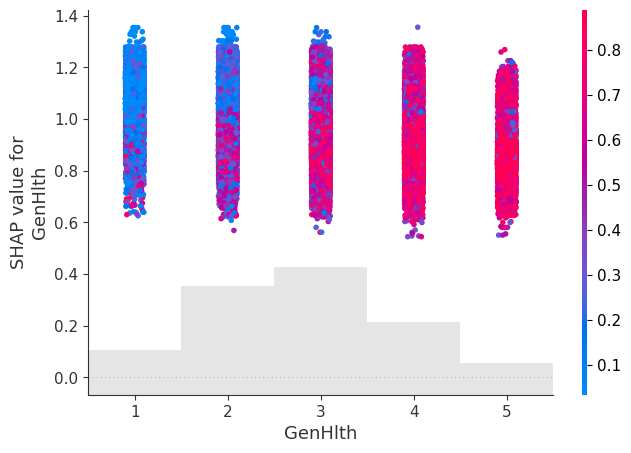

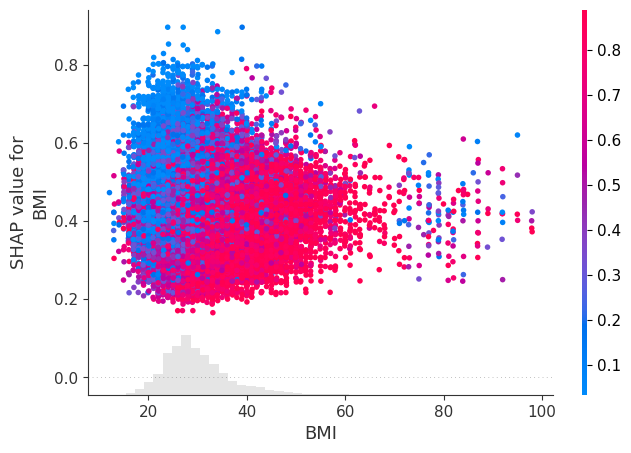

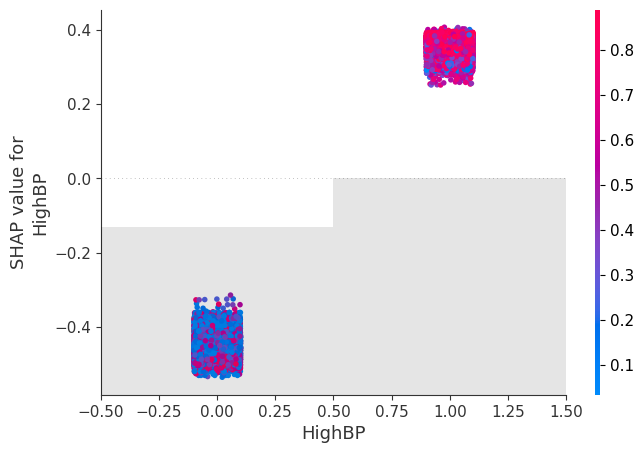

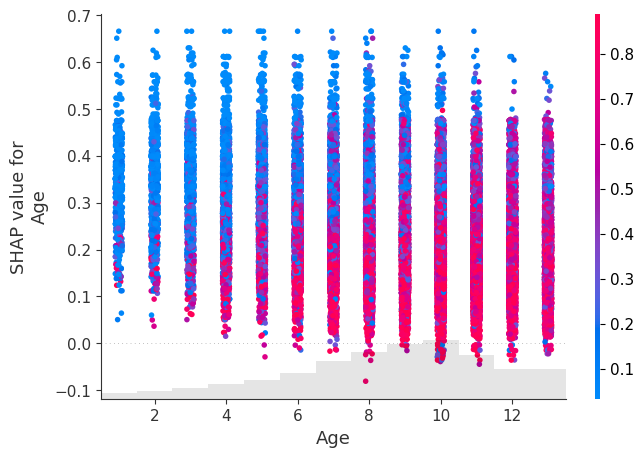

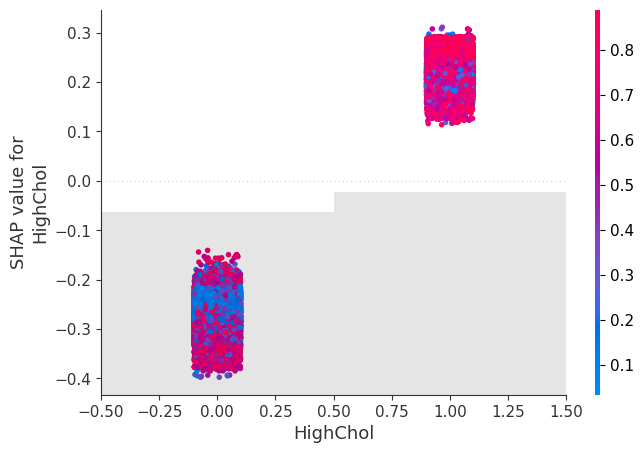

In [42]:
shap_values_abs = np.mean(np.abs(shap_values.values), axis=0)
feature_importance_names = X_train.columns[shap_values_abs.argsort()[::-1]]
for name in feature_importance_names[:5]:
    shap.plots.scatter(
        shap_values[:, name],
        color=pipeline.predict_proba(df[features])[:, 1],
    )

De los gráficos anteriores se infiere:

* A medida que aumenta el valor de la variable GenHlth, la probabilidad de que el paciente tenga diabetes aumenta.
* Cuando el IMB se acerca y supera los 30 las probabilidades de tener diabetes aumentan.
* El tener un una alta presión alterial (HighBP=1) es en promedio un buen indicador para tener diabetes ya que la probabilidad de tenerla aumenta. Lo mismo sucede con HighChol.
* Para la variable de edad (Age) los SHAP values están altamente distribuidos sobre los valores de edad, aunque existe una muy pequeña tendencia (muy dispersa)  que indica que a medida que aumenta la edad disminuyen los SHAP values, es decir, mientras más edad, la contribución de esta variable se hace menos relevante (o levemente negativa) para predecir la diabetes. Aunque cabe destacar que aquellas edades más grandes concentran las mayores probabilidades de padecer la enfermedad, por lo que da para pensar que en esos casos otras features toman más relevancia.

### 5.5 Partial Dependence Plot (0.4 puntos)

Finalmente, se le pide generar un gráfico del tipo Partial Dependence Plot para las mismas 5 variables con mayor impacto global usando una submuestra de 1000 observaciones. ¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos?

In [43]:
X1000 = shap.utils.sample(
    df[features],
    1000,
    random_state=SEED
)

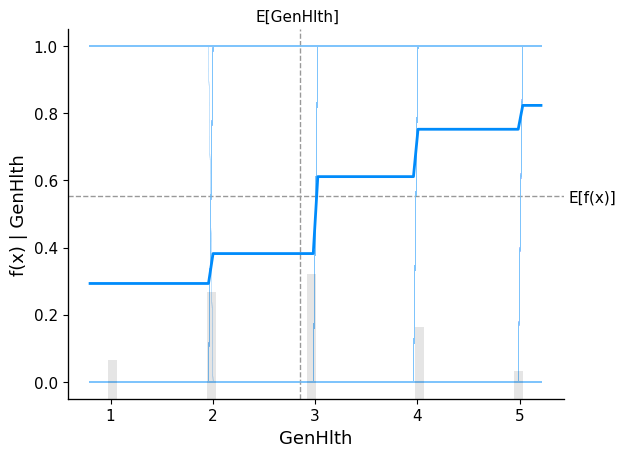

In [44]:
shap.partial_dependence_plot(
    "GenHlth",
    pipeline.predict,
    X1000,
    model_expected_value=True,
    feature_expected_value=True,
)

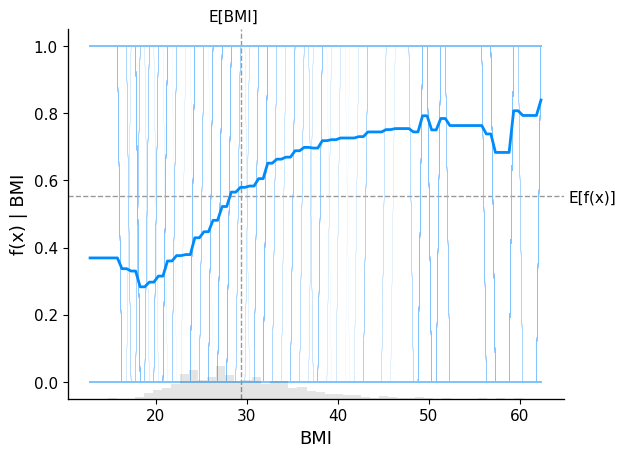

In [45]:
shap.partial_dependence_plot(
    "BMI",
    pipeline.predict,
    X1000,
    model_expected_value=True,
    feature_expected_value=True,
)

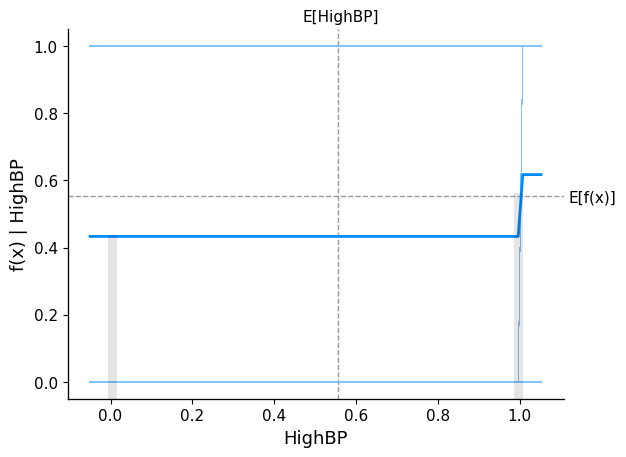

In [47]:
shap.partial_dependence_plot(
    "HighBP",
    pipeline.predict,
    X1000,
    model_expected_value=True,
    feature_expected_value=True,
)

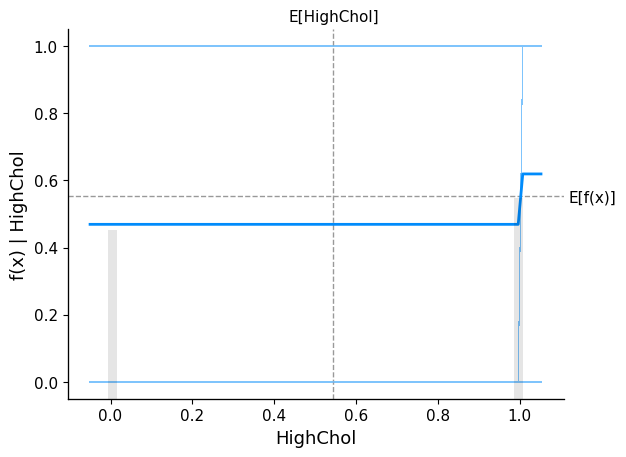

In [46]:
shap.partial_dependence_plot(
    "HighChol",
    pipeline.predict,
    X1000,
    model_expected_value=True,
    feature_expected_value=True,
)

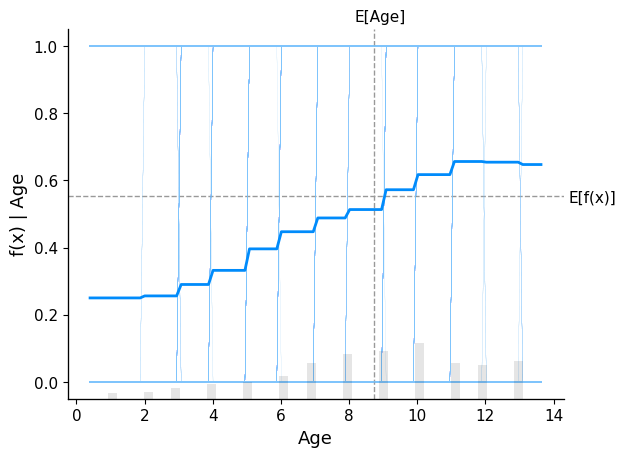

In [48]:
shap.partial_dependence_plot(
    "Age",
    pipeline.predict,
    X1000,
    model_expected_value=True,
    feature_expected_value=True,
)

De los gráficos anteriores se puede observar lo siguiente:

1. **GenHlth**: La contribución marginal promedio de la variable GenHlth respecto a la probabilidad de padecer diabetes es creciente en todo el rango. A partir de GenHlth=3, se observa un incremento significativo que supera el umbral del 50%.
2. **BMI**: La contribución marginal promedio de la variable BMI respecto a la probabilidad de padecer diabetes es creciente en la mayor parte del rango. Es importante destacar que desde BMI=30 en adelante, la probabilidad supera el umbral del 50%.
3. **HighBP y HighChol**: La contribución marginal promedio de las variables HighBP y HighChol respecto a la probabilidad de padecer diabetes es creciente. En particular, cuando cada una de estas variables toma el valor 1, la probabilidad de padecer diabetes supera el umbral del 50%.
4. **Age**: La contribución marginal promedio de la variable Age respecto a la probabilidad de padecer diabetes es creciente en todo su rango, atravesando el umbral del 50% cuando toma el valor 9.

Aunque estos insights son coherentes, es importante tener en cuenta que se trata de contribuciones marginales promedio, por lo que pueden existir imprecisiones al intentar adjudicar este comportamiento a un datapoint específico.

## 6. Sistema de Reglas! (1.0 punto)

<p align="center">
  <img src="https://media.baamboozle.com/uploads/images/125978/1638281150_1380186_gif-url.gif" width="400">
</p>

Después de todo el trabajo hecho, Dr. Simi le pide simplificar el funcionamiento de su modelo en un sistema de reglas que le permita explicar a sus clientes las predicciones que genera su modelo. En particular, Dr. Simi le pide explicar la decisión tomada para las observaciones **1000**, **3001** y **5751**. Con las reglas propuestas señale a **cuánta población** es posible explicar con estas reglas e indique la **precisión** que poseen las reglas en la totalidad de los datos. ¿Tienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta señalando el impacto que tienen sus reglas sobre todo el conjunto de datos.

In [50]:
!pip install alibi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.1/522.1 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 2.1 MB/s eta 0:00:00


In [51]:
from alibi.explainers import AnchorTabular

In [52]:
# Inserte su código para generar sistema de reglas aquí
explainer = AnchorTabular(
    pipeline["xgbclassifier"].predict,
    feature_names=features,
    seed=SEED
)

explainer.fit(
    pipeline["columntransformer"].transform(X_train).values
)



AnchorTabular(meta={
  'name': 'AnchorTabular',
  'type': ['blackbox'],
  'explanations': ['local'],
  'params': {'seed': 42, 'disc_perc': (25, 50, 75)},
  'version': '0.9.6'}
)

In [53]:
class_names = ["no_diabetes", "diabetes"]

idx = 1000
explanation = explainer.explain(X_test.to_numpy()[idx], threshold=0.95)
print('Prediction: ', class_names[explainer.predictor(X_test.to_numpy()[idx].reshape(1, -1))[0]])
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)
print()

idx = 3001
explanation = explainer.explain(X_test.to_numpy()[idx], threshold=0.95)
print('Prediction: ', class_names[explainer.predictor(X_test.to_numpy()[idx].reshape(1, -1))[0]])
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)
print()

idx = 5751
explanation = explainer.explain(X_test.to_numpy()[idx], threshold=0.95)
print('Prediction: ', class_names[explainer.predictor(X_test.to_numpy()[idx].reshape(1, -1))[0]])
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)

Prediction:  diabetes
Anchor: GenHlth > 0.75 AND HeartDiseaseorAttack > 0.00
Precision: 0.99
Coverage: 0.03

Prediction:  diabetes
Anchor: GenHlth > 0.75 AND HighBP > 0.00
Precision: 0.99
Coverage: 0.07

Prediction:  diabetes
Anchor: GenHlth > 0.75 AND HighChol > 0.00
Precision: 0.98
Coverage: 0.05


De lo anterior, es posible observar que en las tres instancias la feature GenHlth siempre está presente, mientras que  de forma individiual aparece enfermedades cardiacas, alta presion arterial y alto colesterol.

La variable GenHlth es la más determinante en este caso para poder predecir el padecimiento de la diabetes, de esto podemos inferir que la predisposicion genetica combinada con alguna de las comorbilidades medicas que se conocen asociadas a la diabetes son un indicador improtante al momento de predecir diabetes

En cuanto a la precisión, esta es de 99%, 99% y 98% respectivamente, en conjunto con coberturas del 3%, 7% y 5% (con respecto a la muestra de mil instancias).

Cabe mencionar que si bien estas reglas sí hacen sentido a priori, es necesario aclarar que poseen una baja cobertura, por lo que no son aplicables para todo el dataset

# Retrospectiva... (1.0 puntos)

En base a los diferentes métodos que implementa y ha comentado en este laboratorio, comente qué métodos le permiten entregar mejores conclusiones para la tarea de clasificación de diabetes. Por otro lado, ¿qué métodos son más útiles para el problema del doctor Simi, métodos agnosticos locales o globales?

Los gráficos de tipo waterfall y PDP, basados en los valores SHAP, ofrecen una visualización intuitiva de los efectos marginales tanto locales como globales de cada característica, según la instancia y el conjunto de datos completo, respectivamente. Como recomendación, no es ideal limitarse a considerar un solo método. Las técnicas globales y locales pueden proporcionar una mejor perspectiva sobre las decisiones del modelo.

Considerar los gráficos PDP permite obtener una visión ex-ante y general de cómo las diferentes variables afectan la probabilidad de tener diabetes. Además, es útil realizar un análisis local, lo que permite tomar acciones médicas más personalizadas según cada paciente.

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://media.tenor.com/ctnq4bhZE3gAAAAC/drsimi-simi.gif)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>